
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [244]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/tmp/ipykernel_12732/2363944234.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [245]:
#https://stackoverflow.com/questions/48063620/pandas-read-csv-for-multiple-delimiters
my_cols = pd.read_csv('./data/heart_disease/columns.csv', sep=";", on_bad_lines='skip').column.values.tolist()
my_cols

data = pd.read_csv('./data/heart_disease/processed.cleveland.data', sep=',', header=None, names=my_cols)
#data = pd.DataFrame(data)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [246]:
#Convert ca and thal in float
#Bases on: https://www.sharpsightlabs.com/blog/pandas-replace/

data = data.replace(to_replace = '?', value = np.nan)
data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [247]:
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


In [248]:
data = data.astype({'ca':'float', 'thal':'float'})
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [249]:
#Check data types
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [250]:
#Check for NaN  under an entire Dataframe
data_NaN =data.isnull().sum().sum()
data_NaN


6

In [251]:
#Drop all row with NaN values
df = data.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


<h4>Split the dataset<h4>

In [252]:
X=df.drop(columns='num')
y=df['num']

In [253]:
#Making out target binary -- Replace elements bases on conditions https://www.statology.org/numpy-replace/
y_binary = y.copy()
y_binary[(y >=2) & (y<=4)] = 1
y_binary

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=0, train_size=0.8, shuffle=True)
X_train.shape


(237, 13)

In [255]:
y_train.shape

(237,)

<h4>Scaling<h4>

In [256]:
#Create standard scaler objet for X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[ 0.40042264 -1.41421356  0.86030302 ...  0.60949041  1.41086898
   0.62092128]
 [-0.14498061 -1.41421356  0.86030302 ...  0.60949041 -0.71215291
  -0.91731925]
 [-1.67210973  0.70710678  0.86030302 ...  0.60949041 -0.71215291
   1.13366813]
 ...
 [ 0.9458259   0.70710678  0.86030302 ... -0.97786373  2.47237993
   1.13366813]
 [-0.47222256  0.70710678  0.86030302 ...  0.60949041 -0.71215291
   1.13366813]
 [ 1.05490655  0.70710678  0.86030302 ...  0.60949041  1.41086898
   0.62092128]]


<h4>PCA<h4>

In [257]:
pca = PCA(n_components=0.9, random_state=17).fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
X_pca.shape

(237, 10)

In [258]:
#Cantidad de componentes necesarios
X_pca.shape[1]

10

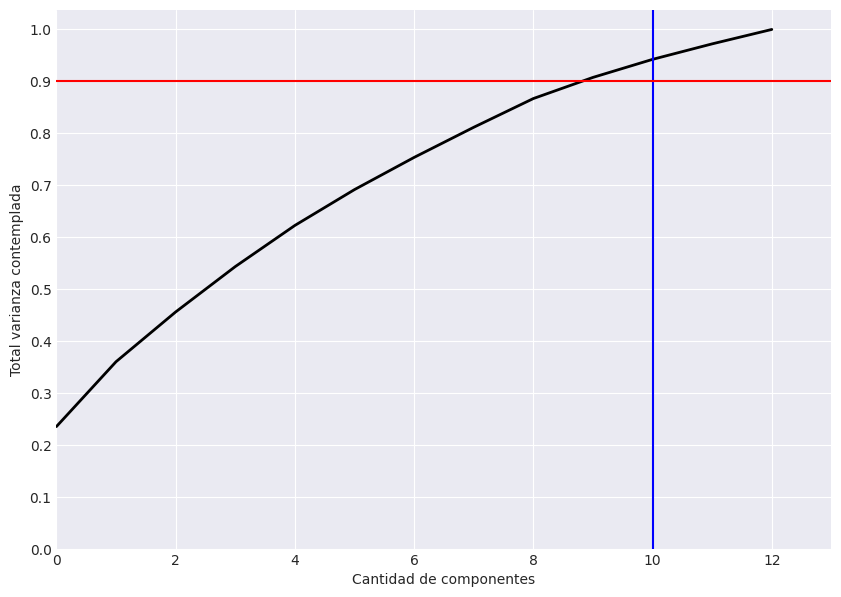

In [259]:
pca_2 = PCA(n_components=13, random_state=17).fit(X_train_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 13)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(10, c='b')
plt.axhline(0.9, c='r')
plt.show();

/tmp/ipykernel_12732/1299802473.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


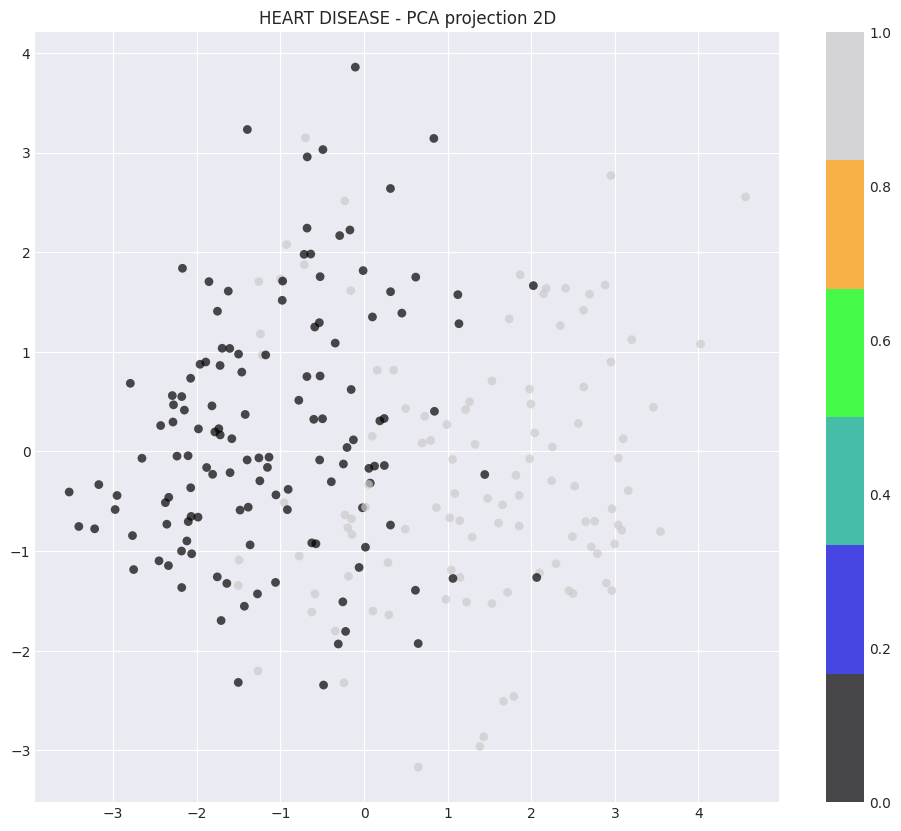

In [260]:
plt.figure(figsize=(12,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()

plt.title('HEART DISEASE - PCA projection 2D');

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [261]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

<h4>Scaled X test<h4>

In [262]:
#Create standard scaler objet for X_test
X_test_scaled = scaler.fit_transform(X_test)


In [263]:
pca = PCA(n_components=0.9, random_state=17).fit(X_test_scaled)
X_test_pca = pca.transform(X_test_scaled)

<h4>Elastic Net<h4>

In [264]:
#Creating elastic net object
elastic_net = ElasticNet(random_state=0)
elastic_net.fit(X_pca, y_train)

#Calculating the prediction
y_predict = elastic_net.predict(X_test_pca)

#Calculating the metrics
score = elastic_net.score(X_test_pca, y_test)
elastic_net_mse = mean_squared_error(y_test, y_predict)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, elastic_net_mse, np.sqrt(elastic_net_mse)))

R2:0.112, MSE:0.22, RMSE:0.47


<h4>Logistic Regression<h4>

In [265]:
#Creating logistic regression object (using default parameters)
logistic_regression = LogisticRegression(random_state=0)

#Fit the model with the data
logistic_regression.fit(X_pca,y_train)

#Calculating the prediction
y_lr_predict = logistic_regression.predict(X_test_pca)

#Calculating the metrics
score = logistic_regression.score(X_test_pca, y_test)
logistic_regression_mse = mean_squared_error(y_test, y_lr_predict)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, logistic_regression_mse, np.sqrt(logistic_regression_mse)))

R2:0.783, MSE:0.22, RMSE:0.47


<h4>Logistic Regression CV<h4>

In [266]:
#Creating logistic regression CV object (using default parameters)
logistic_regressionCV = LogisticRegressionCV(cv=5)

#Fit the model with the data
logistic_regressionCV.fit(X_pca,y_train)

#Calculating the prediction
y_lrCV_predict = logistic_regressionCV.predict(X_test_pca)

#Calculating the metrics
score = logistic_regressionCV.score(X_test_pca, y_test)
logistic_regressionCV_mse = mean_squared_error(y_test, y_lrCV_predict)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, logistic_regressionCV_mse, np.sqrt(logistic_regressionCV_mse)))


R2:0.767, MSE:0.23, RMSE:0.48


<h4>Confusion matrix<h4>

<h5>Linear regression<h5>

In [270]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_lr_predict)

array([[25,  5],
       [ 9, 21]])

In [268]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_lr_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.79      0.77      0.78        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

